In [0]:
#install researchpy
!pip install researchpy

In [0]:
#import the libraries
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.preprocessing import scale
import researchpy as rp
import warnings
from scipy import stats
%matplotlib inline

In [0]:
#read dataset
df = pd.read_csv('/content/drive/My Drive/data_set/blood_pressure.csv')

In [0]:
#check shape
df.shape

(120, 5)

In [0]:
df.head()  #check the head

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [0]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


In [0]:
#check null values
df.isnull().sum()

patient      0
sex          0
agegrp       0
bp_before    0
bp_after     0
dtype: int64

###Pair sample t-test
Pair sample t-test is used to check the mean of two groups at different point in time. Here we want to know whether the bp of patients before and after taking the drug is same or difference. We want to know whether the drug has any effect on patients bp or not.

In [0]:
#check the description of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
patient,120.0,60.500000,34.785054,1.0,30.75,60.5,90.25,120.0
bp_before,120.0,156.450000,11.389845,138.0,147.00,154.5,164.00,185.0
bp_after,120.0,151.358333,14.177622,125.0,140.75,149.5,161.00,185.0


Here we can observe that the mean before intervention is  156.45 and mean after the intervention is 151.36. clearly we can see that there is difference in the mean before and after the intervention but is this difference statstically significant? 

###Check the assumptions

Check for equal variances

In [0]:
#Use levene's test to check variances 
# H0 : Varinaces are same
# H1 : Variances are not same 
#Alpha : 0.05

In [0]:
alpha = 0.05
Stats,p_value = stats.levene(df['bp_before'],df['bp_after'])
if p_value > alpha :
  print('Failed to reject null hypothesis, variances are same')
else :
  print('Reject null hypothesis, Variances are not same')

Reject null hypothesis, Variances are not same


Check for normality

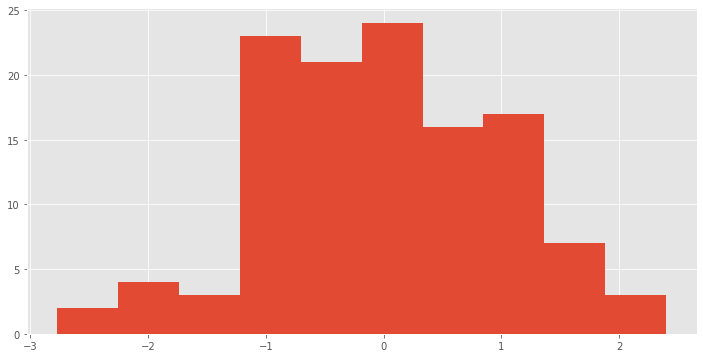

In [0]:
diff = scale(df['bp_before'] - df['bp_after'])  #take the difference b/w before and after,and scale the differences
#plot histogram of scaled differences
plt.figure(figsize=(12,6))
plt.hist(diff)
plt.show()

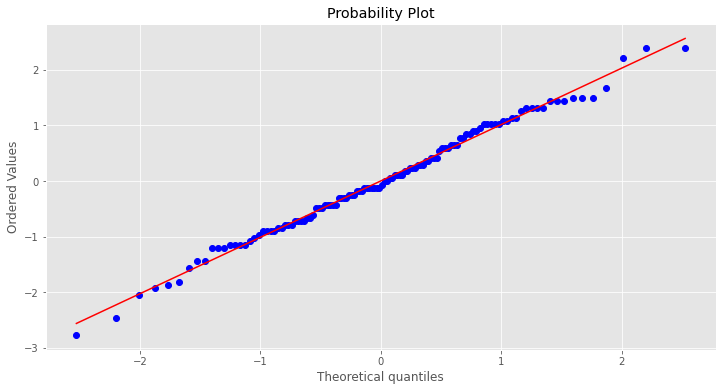

In [0]:
#q-q plot to check normality
plt.figure(figsize=(12,6))
stats.probplot(diff, plot=plt, dist = 'norm')
plt.show()

In [0]:
#Let's use shapiro-wilk test to check normality
#H0 : Residuals are normally distributed
#H1 : Residuals are not normally distributed
alpha = 0.05
stats,p_value = stats.shapiro(diff)
if p_value > alpha:
  print('Failed to reject null hypothesis \n P-value: {}'.format(p_value))
else:
  print('Reject null hypothesis \n P-value: {}'.format(p_value))

Failed to reject null hypothesis 
 P-value: 0.7841646671295166


In [0]:

#H0 : There's no difference in mean(No difference before and after an intervention)
#H1 : There's a difference in mean (There is difference before and after an intervention)
#Alpha : 0.5
alpha = 0.05
statistic , p_value = stats.ttest_rel(df['bp_before'],df['bp_after'])
if p_value > alpha:
  print(f'Fail to reject Null Hypothesis p-value is {p_value}')
else:
  print(f'Reject Null Hypothesis \nP_value : {p_value}')

Reject Null Hypothesis 
P_value : 0.0011297914644840823


result shows that we can reject our null hypothesis and accept that there is a significant difference before and after intervention.

But while checking for assumptions of equal variance using leven's test ------ we saw that the variances are not same in both the sample. In such condition when the sample variances are not same we use Wilcoxon Signed Rank test.

In [0]:
#we will use researchpy and see it's fusefullness here.
rp.ttest(df['bp_before'],df['bp_after'], equal_variances = False, paired =True)

,Wilcoxon signed-rank test,results
0,Mean for bp_before =,156.450000
1,Mean for bp_after =,151.358333
2,T value =,2234.500000
3,Z value =,-3.191600
4,Two sided p value =,0.001400
5,r =,-0.206000


Here we have used researchpy library for Wilcoxon Signed Rank test. We have specified equal_variances = False as the sample variances are not equal and paired=True for paired sample t-test.

We see that p-value (0.0014) is less than alpha (0.05). So we can reject null hypothesis.